## Data Analysis Notebook


In this notebook, we use matplotlib, geopandas, and seaborn to conduct fundamental analysis and visualize data and metadata retrieved from the Data Retrieval Notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import geopandas

In [ ]:
# Plot the distribution of wind speed for all 100 points at 60 min resolution
# Noticeably, this distribution is very consistently skewed right regardless of the point
for filename in os.listdir(r"Data\NOW-23 Great Lakes [2000-2020] 60min"):
    data = pd.read_csv("Data/NOW-23 Great Lakes [2000-2020] 60min/" + filename, index_col=0)
    data = data[data["Hour"] == 0]
    data["wind speed at 80m (m/s)"].hist(bins=50)

C:\Users\shell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


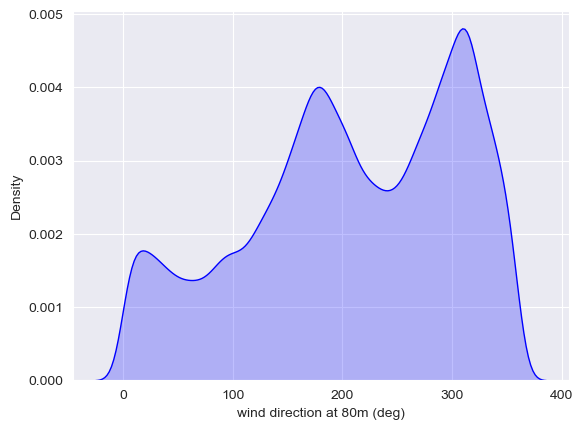

In [3]:
# Let's look at the wind direction data for a single point at 5 min resolution
data = pd.read_csv("Data/NOW-23 Great Lakes [2000-2020] 60min/7871.csv", index_col=0)

# We can draw a nice line representing the histogram using Kernel Density Estimation
sns.kdeplot(data["wind direction at 80m (deg)"], color="blue", fill=True)
plt.show()

C:\Users\shell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


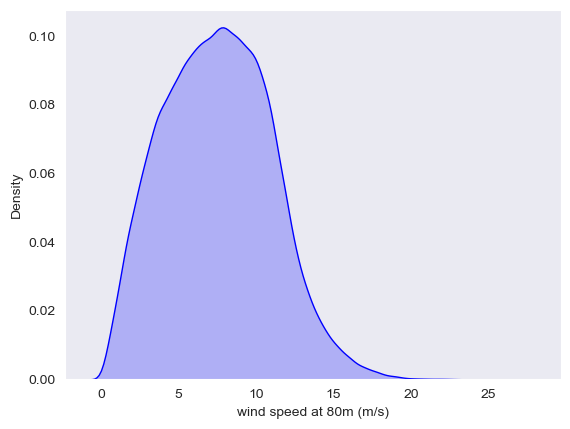

In [5]:
# We can do the same for the wind speed
sns.kdeplot(data["wind speed at 80m (m/s)"], color="blue", fill=True)
plt.grid(False)
plt.show()

KeyError: 'Target wind speed (24h)'

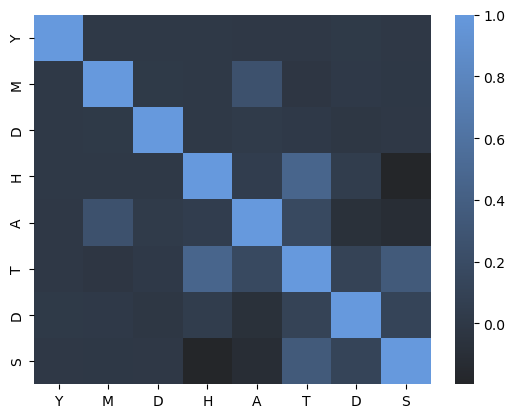

In [18]:
# We can make a correlation matrix to visualize the correlation between the variables
data = pd.read_csv("Data/NOW-23 Great Lakes [2000-2020] 60min/7871.csv", index_col=0)
data.columns = ["Y", "M", "D", "H", "M", "A", "T", "D", 'S']
data = data.iloc[:, [0, 1, 2, 3, 5, 6, 7, 8]]

corr_matrix = data.corr()
blue_map = sns.dark_palette("#69d", reverse=False, as_cmap=True)
sns.heatmap(corr_matrix, cmap=blue_map)
corr_matrix["Target wind speed (24h)"]

<BarContainer object of 4 artists>

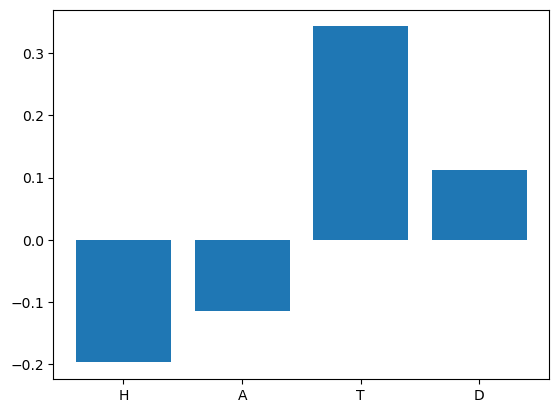

In [48]:
plt.bar(['H', 'A', 'T', 'D'], corr_matrix['S'].iloc[3:7])

In [8]:
# Bin the data so we can create a wind rose chart
data = pd.read_csv("Data/NOW-23 Great Lakes [2000-2020] 60min/7871.csv", index_col=0)
df = pd.DataFrame()
df['direction'] = ['N', 'NNE', 'NE', 'ENE', 'E', "ESE", "SE", "SSE", "S", 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW'] * 8
df['strength (m/s)'] = ['0-2'] * 16 + ['2-4'] * 16 + ['4-6'] * 16 + ['6-8'] * 16 + ['8-10']* 16 + ['10-12'] * 16 + ['12-14'] * 16 + ['14+'] * 16
df['frequency'] = [0] * len(df)

for i in  range(len(data)):
    direction, speed = data.iloc[i, 7:9]
    index = 0
    
    if np.round(speed)/2 >= 7:
        index += 16 * 7
    else:
        index += 16 * np.round(speed/2)
    
    if np.round(direction/22.5) == 16:
        index += 0
    else:
        index += np.round(direction/22.5)
    df.iloc[int(index), 2] += 1

,direction,strength (m/s),frequency
0,N,0-2,151
1,NNE,0-2,125
2,NE,0-2,138
3,ENE,0-2,110
4,E,0-2,124
...,...,...,...
123,WSW,14+,648
124,W,14+,659
125,WNW,14+,1065
126,NW,14+,1621


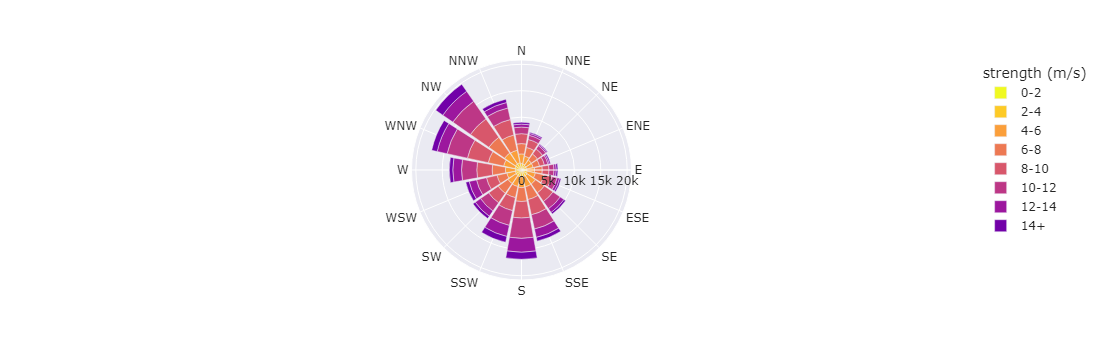

In [13]:
import plotly.express as px
fig = px.bar_polar(df, r="frequency", theta="direction",
                   color="strength (m/s)", template="seaborn",
                   color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

In [70]:
metadata = geopandas.read_file(r"Data/Muskegon site metadata.csv").iloc[:, 1:]
metadata.loc[1] = [141132, -5, 0, -86.30, 43.16, "United States"]
metadata["SiteID"] = ["NOW-23 Great Lakes", "Lake Michigan Wind Assessment"]
metadata.rename(columns={"SiteID": "Site Dataset"}, inplace=True)

gdf = geopandas.GeoDataFrame(
    metadata, 
    geometry=geopandas.points_from_xy(metadata['Longitude'], metadata['Latitude']), crs="EPSG:4326"
)

def my_colormap(value):
    if values == "NOW-23 Great Lakes":
        return "deepskyblue"
    return "seagreen"

gdf.explore(marker_type="circle_marker", 
            marker_kwds=dict(radius=6), 
            cmap=["darkblue", "seagreen"],
            column="Site Dataset"
           )

In [69]:
metadata

,Site Dataset,Site Timezone,Data Timezone,Longitude,Latitude,Country
0,NOW-23 Great Lakes,-5,0,-86.300964,43.16462,United States
1,Lake Michigan Wind Assessment,-5,0,-86.3,43.16,United States
